# Estatística Descritiva e Análise Exploratória de Dados &mdash; Atividade Prática

**Prof. Dr. Jefferson O. Andrade**  
**Pós-graduação em Desenvolvimento de Aplicações Inteligentes**  
**Estatística para Aprendizado de Máquina — Aula 03**  

**Nome:** Evandro Canal Severgnini  
**Matrícula:** 20231DEVAI0149

## Introdução e Preparação

Nesta atividade, mergulharemos fundo no conjunto de dados sobre preços de imóveis na cidade de Boston, com o objetivo de compreender as características que influenciam os preços das casas e explorar relações complexas entre as variáveis. A análise será dividida em etapas estruturadas para facilitar a compreensão e extração de insights dos dados.

**Objetivo da Atividade:** Realizar uma análise exploratória aprofundada, abordando estatísticas descritivas, visualizações complexas e relações multivariadas, preparando o terreno para futuros modelos preditivos.

## Carregando e Inspecionando o Conjunto de Dados

Vamos começar carregando e fazendo uma inspeção inicial do conjunto de dados.

In [22]:
import sklearn
print(sklearn.__version__)

# Importando as bibliotecas necessárias
import pandas as pd

# DEPRECIADO desde a versão 1.2
#from sklearn.datasets import load_boston
#boston_data = load_boston()
#df_boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
#df_boston['PRICE'] = boston_data.target
#display(df_boston.head())
#df_boston.info()

#Solução alternativa
# Carregando o conjunto de dados de uma url pública o dataset Boston Housing
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df_boston = pd.read_csv(url)

# Visualizando as primeiras linhas e informações gerais do DataFrame
display(df_boston.head())
df_boston.info()
# Visualizando o total de linhas
n_linhas = df_boston.shape[0]
print(f"O DataFrame tem {n_linhas} linhas.")

1.6.0


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
O DataFrame tem 506 linhas.



# Descrição das Colunas:
* crim: Taxa de criminalidade per capita.
* zn: Proporção de terrenos residenciais divididos em lotes maiores que 25.000 pés².
* indus: Proporção de hectares de negócios não varejistas por cidade.
* chas: Variável binária indicando se o imóvel está próximo ao rio Charles (1 = sim, 0 = não).
* nox: Concentração de óxidos nítricos (poluição do ar).
* rm: Número médio de cômodos por habitação.
* age: Proporção de unidades construídas antes de 1940.
* dis: Distâncias ponderadas até 5 centros de emprego em Boston.
* rad: Índice de acessibilidade às rodovias radiais.
* tax: Taxa de imposto sobre propriedade por 10.000 dólares.
* ptratio: Proporção aluno-professor por cidade.
* b: 1000(Bk - 0.63)^2, onde Bk é a proporção de negros por cidade.
* lstat: Percentual de status socioeconômico mais baixo.
* medv: Valor médio das casas ocupadas pelo proprietário (em milhares de dólares).

## Análise Estatística Básica

1. **Resumo Estatístico:** Forneça estatísticas descritivas para cada variável (média, mediana, desvio padrão, min, max).

    ```python
    display(df_boston.describe())
    ```

2. **Distribuição dos Preços:** Utilize um histograma para visualizar a distribuição dos preços dos imóveis.


In [23]:
display(df_boston.describe())

# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from IPython.display import display, Markdown

# Calculando as estatísticas descritivas
stats = df_boston.describe()

texto = f"""
# Resumo estatístico sobre os dados das casas em Boston:

## Estatísticas Básicas:
1. **Número de Linhas e Colunas:**
   - O dataset contém {df_boston.shape[0]} linhas e {df_boston.shape[1]} colunas.

2. **Criminalidade (`crim`):**
   - **Média:** {stats.loc['mean', 'crim']:.2f}
   - **Mínimo:** {stats.loc['min', 'crim']:.2f}
   - **Máximo:** {stats.loc['max', 'crim']:.2f}
   - **Conclusão:** A taxa de criminalidade varia bastante. A maioria dos bairros é segura, mas alguns têm taxas muito altas.

3. **Terrenos grandes (`zn`):**
   - **Média:** {stats.loc['mean', 'zn']:.2f}
   - **Máximo:** {stats.loc['max', 'zn']:.2f}
   - **Conclusão:** Muitos bairros têm **0% de terrenos grandes**, mas alguns são 100% residenciais.

4. **Proximidade ao Rio Charles (`chas`):**
   - Apenas {df_boston['chas'].sum()} bairros têm casas perto do rio Charles.

5. **Número de Cômodos (`rm`):**
   - **Média:** {stats.loc['mean', 'rm']:.2f}
   - **Mínimo:** {stats.loc['min', 'rm']:.2f}
   - **Máximo:** {stats.loc['max', 'rm']:.2f}
   - **Conclusão:** Casas com mais cômodos provavelmente custam mais.

6. **Riqueza da População (`lstat`):**
   - **Média:** {stats.loc['mean', 'lstat']:.2f}
   - **Máximo:** {stats.loc['max', 'lstat']:.2f}
   - **Conclusão:** Há bairros com até quase 38% da população em condições socioeconômicas mais baixas.

7. **Preço das Casas (`medv`):**
   - **Média:** {stats.loc['mean', 'medv']:.2f} mil dólares
   - **Mínimo:** {stats.loc['min', 'medv']:.2f} mil dólares
   - **Máximo:** {stats.loc['max', 'medv']:.2f} mil dólares
   - **Atenção:** 50 mil dólares é o limite superior no dataset. Algumas casas podem valer mais, mas o dado foi “cortado”.


## O que podemos aprender com isso?
- Há bairros bem diferentes, de áreas mais pobres e perigosas a bairros ricos e tranquilos.
- Casas maiores (`rm`) e próximas ao rio Charles (`chas`) tendem a custar mais.
- Áreas com maior criminalidade (`crim`) ou mais pobreza (`lstat`) geralmente têm preços mais baixos.
- A maioria das casas custa entre **20 e 25 mil dólares**, mas algumas chegam ao limite de **50 mil dólares**.

"""

# Exibir a caixa de texto com o resumo
display(Markdown(texto))


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000



# Resumo estatístico sobre os dados das casas em Boston:

## Estatísticas Básicas:
1. **Número de Linhas e Colunas:**
   - O dataset contém 506 linhas e 14 colunas.

2. **Criminalidade (`crim`):**
   - **Média:** 3.61
   - **Mínimo:** 0.01
   - **Máximo:** 88.98
   - **Conclusão:** A taxa de criminalidade varia bastante. A maioria dos bairros é segura, mas alguns têm taxas muito altas.

3. **Terrenos grandes (`zn`):**
   - **Média:** 11.36
   - **Máximo:** 100.00
   - **Conclusão:** Muitos bairros têm **0% de terrenos grandes**, mas alguns são 100% residenciais.

4. **Proximidade ao Rio Charles (`chas`):**
   - Apenas 35 bairros têm casas perto do rio Charles.

5. **Número de Cômodos (`rm`):**
   - **Média:** 6.28
   - **Mínimo:** 3.56
   - **Máximo:** 8.78
   - **Conclusão:** Casas com mais cômodos provavelmente custam mais.

6. **Riqueza da População (`lstat`):**
   - **Média:** 12.65
   - **Máximo:** 37.97
   - **Conclusão:** Há bairros com até quase 38% da população em condições socioeconômicas mais baixas.

7. **Preço das Casas (`medv`):**
   - **Média:** 22.53 mil dólares
   - **Mínimo:** 5.00 mil dólares
   - **Máximo:** 50.00 mil dólares
   - **Atenção:** 50 mil dólares é o limite superior no dataset. Algumas casas podem valer mais, mas o dado foi “cortado”.


## O que podemos aprender com isso?
- Há bairros bem diferentes, de áreas mais pobres e perigosas a bairros ricos e tranquilos.
- Casas maiores (`rm`) e próximas ao rio Charles (`chas`) tendem a custar mais.
- Áreas com maior criminalidade (`crim`) ou mais pobreza (`lstat`) geralmente têm preços mais baixos.
- A maioria das casas custa entre **20 e 25 mil dólares**, mas algumas chegam ao limite de **50 mil dólares**.



## **Análise de Correlação (30 minutos)**

1. **Correlação com o Preço:** Identifique e liste as características com maior correlação (positiva e negativa) em relação ao preço.

2. **Mapa de Calor de Correlação:** Visualize a matriz de correlação entre todas as variáveis usando um heatmap.

    ```python
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 8))
    sns.heatmap(df_boston.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
    ```


Correlação com o Preço (medv):
medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64




# 1) Correlação com o preço:
##Positivo:
1. rm (número de cômodos): 0.69 => Mais cômodos aumentam o preço.
2. zn (terrenos grandes): 0.36 =>  Terrenos maiores também elevam o preço.
Correlação negativa mais forte:

Negativo:
1. lstat (percentual de status socioeconômico mais baixo): -0.74 => Quanto maior a pobreza, menor o preço.
2. nox (poluição): -0.57 => Mais poluição está associada a preços menores.



# 2) Mapa de Calor de Correlação: 


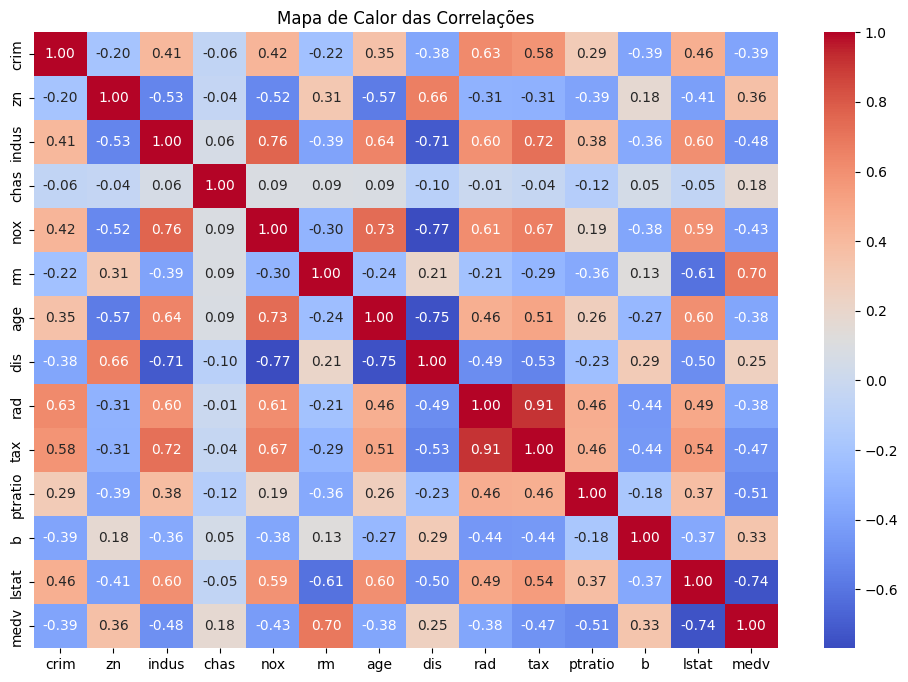


## Resultado Visual:
O heatmap mostra uma matriz de correlações, onde:
1. Cores vermelhas representam correlações negativas.
2. Cores azuis representam correlações positivas.
3. Quanto mais intensa a cor, mais forte é a correlação.

## Conclusões:

### Variáveis com maior impacto positivo no preço (medv):
1. rm (número de cômodos): Mais cômodos aumentam o preço.
2. zn (terrenos grandes): Bairros com mais terrenos grandes são mais caros.

### Variáveis com maior impacto negativo no preço (medv):

1. lstat (pobreza): Quanto maior o percentual de população de status socioeconômico mais baixo, menor o preço.
2 .nox (poluição): Bairros mais poluídos têm preços mais baixos.

Algumas variáveis, como chas (proximidade ao rio Charles), têm correlação baixa com o preço, indicando que podem não ser muito relevantes.




In [32]:
# 1) Correção com o preço
# Calcular correlações de todas as variáveis com o preço (medv)
correlation_with_price = df_boston.corr()['medv'].sort_values(ascending=False)

# Exibir as características mais correlacionadas positiva e negativamente
print("Correlação com o Preço (medv):")
print(correlation_with_price)

texto = f"""

# 1) Correlação com o preço:
##Positivo:
1. rm (número de cômodos): 0.69 => Mais cômodos aumentam o preço.
2. zn (terrenos grandes): 0.36 =>  Terrenos maiores também elevam o preço.
Correlação negativa mais forte:

Negativo:
1. lstat (percentual de status socioeconômico mais baixo): -0.74 => Quanto maior a pobreza, menor o preço.
2. nox (poluição): -0.57 => Mais poluição está associada a preços menores.
"""
# Exibir a caixa de texto
display(Markdown(texto))

# 2) Mapa de Calor de Correlação
import seaborn as sns
import matplotlib.pyplot as plt

texto = f"""
# 2) Mapa de Calor de Correlação:
"""
display(Markdown(texto))

# Criar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_boston.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor das Correlações")
plt.show()

texto = f"""
## Resultado Visual:
O heatmap mostra uma matriz de correlações, onde:
1. Cores vermelhas representam correlações negativas.
2. Cores azuis representam correlações positivas.
3. Quanto mais intensa a cor, mais forte é a correlação.

## Conclusões:

### Variáveis com maior impacto positivo no preço (medv):
1. rm (número de cômodos): Mais cômodos aumentam o preço.
2. zn (terrenos grandes): Bairros com mais terrenos grandes são mais caros.

### Variáveis com maior impacto negativo no preço (medv):

1. lstat (pobreza): Quanto maior o percentual de população de status socioeconômico mais baixo, menor o preço.
2 .nox (poluição): Bairros mais poluídos têm preços mais baixos.

Algumas variáveis, como chas (proximidade ao rio Charles), têm correlação baixa com o preço, indicando que podem não ser muito relevantes.


"""
display(Markdown(texto))


## Visualizações Avançadas

1. **Relações Bivariadas:** Utilize scatterplots para visualizar a relação entre algumas das variáveis mais correlacionadas com o preço. Esta etapa pode ajudar a identificar tendências ou outliers.

2. **Boxplots para Categorias:** Suponha que queiramos entender como o preço varia com a proximidade ao rio Charles (variável `CHAS`). Um boxplot pode ajudar a comparar a distribuição de preços para imóveis próximos e distantes do rio.

3. **Outras visualizações:** Utilize outras visualizações que você considerar úteis para analisar os dados e indique que *insights* essas visuzlizações trouxeram.


In [ ]:
# Escreva sua resposta aqui
# ...


## Discussão e Conclusões

1. **Padrões e Insights:** Com base nas visualizações e análises, discuta padrões identificados e insights extraídos dos dados.

2. **Limitações dos Dados:** Toda análise é limitada pela qualidade e abrangência dos dados. Discuta possíveis limitações deste conjunto de dados e como elas podem afetar as conclusões.

3. **Próximos Passos:** Sugira possíveis próximas etapas, seja aprofundar a análise em áreas específicas, seja preparar os dados para modelagem de aprendizado de máquina.


**Respostas:**  


# Discussão e Conclusões
## Padrões e Insights
1. Impacto das Variáveis no Preço:

- Variáveis com maior impacto positivo:
O número de cômodos (rm) é a variável mais correlacionada positivamente com o preço. Casas maiores geralmente são mais valorizadas.
Bairros com maior proporção de terrenos grandes (zn) também tendem a ter casas mais caras.
2. Variáveis com maior impacto negativo:
- O percentual de população de status socioeconômico mais baixo (lstat) é a variável mais correlacionada negativamente com o preço. Bairros com maior pobreza têm preços menores.
Poluição (nox) também está negativamente associada ao preço, indicando que áreas mais poluídas tendem a ser menos valorizadas.
3. Outras Observações:

- A proximidade ao rio Charles (chas) tem pouca influência nos preços, com correlação fraca.
- Variáveis como tax (impostos) e rad (acessibilidade às rodovias) têm correlações negativas, sugerindo que áreas com altos impostos ou tráfego intenso podem ser menos atraentes.

## Interpretação dos Resultados:
Esses padrões confirmam tendências esperadas: **casas maiores, em bairros ricos e pouco poluídos, têm maior valor de mercado. Por outro lado, áreas mais pobres e menos saudáveis são menos valorizadas.**


**Nota aos Alunos:** A análise exploratória é um processo contínuo e iterativo. Ao se deparar com questões ou insights interessantes, não hesite em explorá-los mais a fundo. A habilidade de fazer perguntas pertinentes e buscar suas respostas é fundamental em ciência de dados. Boa exploração!